<a href="https://colab.research.google.com/github/manju-yadav211/The-Sparks-Foundation/blob/master/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning

```
Task 4
```



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
df=pd.read_csv('/content/Iris.csv')

In [49]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Kmeans**# 

In [51]:
#so there are 150 rows and 6 columns
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y= make_blobs(n_samples = 500, centers = 4,
            cluster_std = 0.40, random_state = 0)


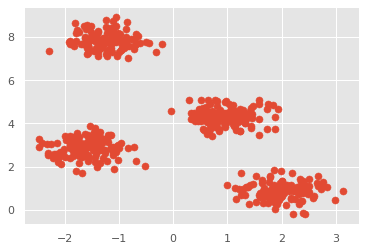

In [52]:
plt.scatter(X[:, 0], X[:, 1], 
            
            s = 50);
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4)


In [54]:
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift
from matplotlib import style
style.use("ggplot")





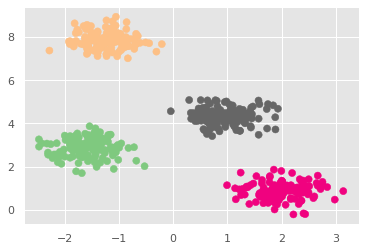

In [56]:
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='Accent')

centers= kmeans.cluster_centers_

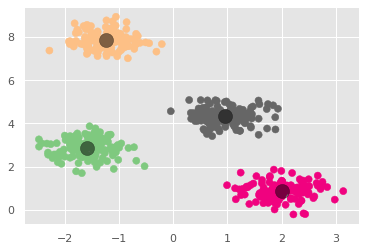

In [57]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='Accent')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.show()

here the centers are due to alpha appointed points if low than 0.5 then the colour is lighter and if greater than 0.5 is darker

In [ ]:
#hierarchical clustering or mean shift cluster analysis
#we need to start with the data points assigned to a cluster of their own.
#it computes the centroids and update the location of new centroids.
# repeating this process, we move closer the peak of cluster i.e. towards the region of higher density.
#algorithm stops at the stage where centroids do not move anymore

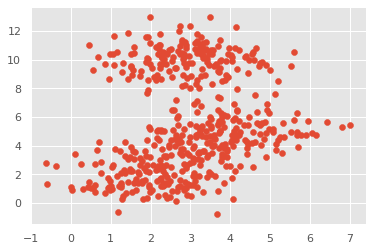

In [58]:
centers = [[2,2],[4,5],[3,10]]
X,_ = make_blobs(n_samples=500, centers = centers, cluster_std=1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [59]:
#now we have need to train the mean shift cluster model with input data
from sklearn.cluster import KMeans

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [60]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)


[[ 2.88731499  3.36622735]
 [ 2.89524313 10.04552829]]
Estimated clusters: 2


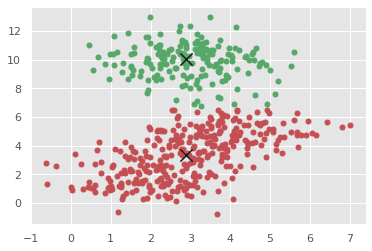

In [61]:
colors=10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
  plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
  marker = 'x',color = 'k', s = 150, linewidths= 5, zorder=10)
plt.show()

Measuring the Clustering Performance
The real world data is not naturally organized into number of distinctive clusters. Due to this reason, it is not easy to visualize and draw inferences. That is why we need to measure the clustering performance as well as its quality. It can be done with the help of silhouette analysis.

Silhouette Analysis
This method can be used to check the quality of clustering by measuring the distance between the clusters. Basically, it provides a way to assess the parameters like number of clusters by giving a silhouette score. This score is a metric that measures how close each point in one cluster is to the points in the neighboring clusters.

In [62]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [63]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0)


In [64]:
scores = []
values = np.arange(2, 10)


In [65]:
for num_clusters in values:
  kmeans =KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
score = metrics.silhouette_score(X, kmeans.labels_,metric = 'euclidean', sample_size =len(X))


In [67]:
print("\nNumber of clusters =", num_clusters)
print("Silhouette score =", score)
scores.append(score)



Number of clusters = 9
Silhouette score = 0.3279659667987856


In [68]:
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)



Optimal number of clusters = 2


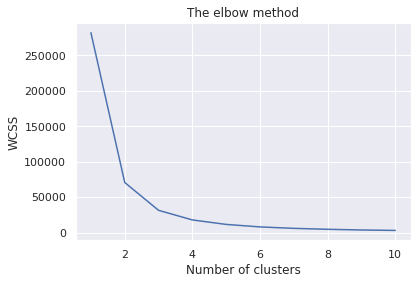

In [69]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [70]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

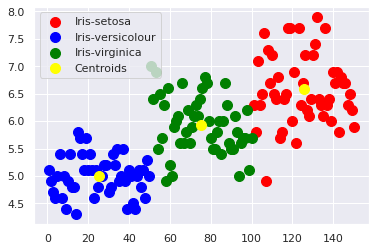

In [71]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()